In [1]:
"""Market_Cap_Sector_Industry_Classification.ipynb

This notebook enhances our insider trading dataset with company information
including market cap, sector, and industry classification.
"""

'Market_Cap_Sector_Industry_Classification.ipynb\n\nThis notebook enhances our insider trading dataset with company information\nincluding market cap, sector, and industry classification.\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import time
import os
from tqdm.notebook import tqdm  # Progress bar for loops
import pandas as pd
from io import BytesIO

In [3]:
#If using conda update using the following commands:
#%conda install -c conda-forge ipywidgets
#%conda update jupyter

#If using pip, update using the following commands:
#%pip install ipywidgets --upgrade
#%pip install jupyter --upgrade

In [4]:
# Load the insider trading dataset
print("Loading insider trading dataset...")
insider_df = pd.read_csv('notebook3_added_price_data.csv')

print("\nFirst 3 rows of the data:")
print(insider_df.head(3))

Loading insider trading dataset...

First 3 rows of the data:
      Insider Name   Insider Title Insider Role                      Issuer  \
0  AARNES ROBERT B  President, ADI      Officer  RESIDEO TECHNOLOGIES, INC.   
1  AARNES ROBERT B  President, ADI      Officer  RESIDEO TECHNOLOGIES, INC.   
2  AARNES ROBERT B  President, ADI      Officer  RESIDEO TECHNOLOGIES, INC.   

  Ticker  CIK Code Period of Report Transaction Date      Security  \
0   REZI   1740332      12-APR-2019      12-APR-2019  Common Stock   
1   REZI   1740332      12-AUG-2019      12-AUG-2019  Common Stock   
2   REZI   1740332      12-DEC-2019      12-DEC-2019  Common Stock   

  Transaction Code  ... spy_price_2month spy_trend_2month  spy_price_3month  \
0                P  ...           262.77          -0.0004            275.27   
1                P  ...           272.52           0.0007            284.22   
2                P  ...           311.89           0.0014            229.34   

   spy_trend_3month  sp

In [5]:

# Install and import yfinance (only if needed)
try:
    import yfinance as yf
except ImportError:
    !pip install yfinance --upgrade --no-cache-dir
    import yfinance as yf

In [6]:
def get_company_info(ticker):
    """
    Retrieves company information from Yahoo Finance

    Args:
        ticker (str): Stock ticker symbol

    Returns:
        dict: Dictionary with company information or None if retrieval fails
    """
    try:
        # Handle problematic tickers
        clean_ticker = ticker.strip().replace(' ', '')
        if not clean_ticker or clean_ticker.upper() in ['NONE', 'N/A']:
            return None

        # Some tickers may have special characters or formats that cause issues
        if '/' in clean_ticker:
            clean_ticker = clean_ticker.replace('/', '-')

        # Create ticker object
        ticker_obj = yf.Ticker(clean_ticker)

        # Get company info
        info = ticker_obj.info

        # Extract relevant fields
        company_data = {
            'sector': info.get('sector', None),
            'industry': info.get('industry', None),
            'market_cap': info.get('marketCap', None),
            'beta': info.get('beta', None),
            'pe_ratio': info.get('trailingPE', None),
            'forward_pe': info.get('forwardPE', None),
            'dividend_yield': info.get('dividendYield', None),
            'fifty_two_week_high': info.get('fiftyTwoWeekHigh', None),
            'fifty_two_week_low': info.get('fiftyTwoWeekLow', None),
            'company_name': info.get('longName', None)
        }

        return company_data

    except Exception as e:
        if "429" in str(e):
            print(f"Rate limit exceeded for {ticker}. Waiting...")
            time.sleep(2)  # Wait longer on rate limit errors
            return None
        else:
            # For other errors, just log and continue
            print(f"Error retrieving data for {ticker}: {e}")
            return None

# Test the function with a sample ticker that we know exists in the dataset
sample_ticker = insider_df['Ticker'].iloc[0]
print(f"\nTesting company info retrieval with ticker: {sample_ticker}")
sample_info = get_company_info(sample_ticker)
if sample_info:
    for key, value in sample_info.items():
        print(f"{key}: {value}")
else:
    print(f"Could not retrieve info for {sample_ticker}, trying another ticker...")
    sample_ticker = 'AAPL'  # Use a well-known ticker as backup
    sample_info = get_company_info(sample_ticker)
    if sample_info:
        print(f"Retrieved info for {sample_ticker} instead:")
        for key, value in sample_info.items():
            print(f"{key}: {value}")


Testing company info retrieval with ticker: REZI
Error retrieving data for REZI: Too Many Requests. Rate limited. Try after a while.
Could not retrieve info for REZI, trying another ticker...
Retrieved info for AAPL instead:
sector: Technology
industry: Consumer Electronics
market_cap: 2972086697984
beta: 1.211
pe_ratio: 30.75592
forward_pe: 23.945944
dividend_yield: 0.52
fifty_two_week_high: 260.1
fifty_two_week_low: 169.21
company_name: Apple Inc.


In [7]:
company_info_columns = [
    'sector', 'industry', 'market_cap', 'beta', 'pe_ratio',
    'forward_pe', 'dividend_yield', 'fifty_two_week_high',
    'fifty_two_week_low', 'company_name'
]

# Get unique tickers to minimize API calls
unique_tickers = insider_df['Ticker'].unique()
print(f"\nRetrieving company information for {len(unique_tickers)} unique tickers...")

# Create a dictionary to store company info by ticker
company_info_dict = {}

# Track successful retrievals
success_count = 0
total_count = 0

# Process all unique tickers with progress bar and rate limiting
for ticker in tqdm(unique_tickers):
    total_count += 1

    # Skip if we already have info for this ticker (sometimes duplicates exist)
    if ticker in company_info_dict:
        continue

    # Get company info
    company_info = get_company_info(ticker)

    # Store in dictionary if successful
    if company_info and any(company_info.values()):
        company_info_dict[ticker] = company_info
        success_count += 1


    # Print progress update every 50 tickers
    if total_count % 50 == 0:
        print(f"Progress: {success_count}/{total_count} successful ({success_count/total_count*100:.1f}%)")

print(f"Successfully retrieved info for {success_count} of {len(unique_tickers)} tickers ({success_count/len(unique_tickers)*100:.1f}%)")



Retrieving company information for 3003 unique tickers...


  0%|          | 0/3003 [00:00<?, ?it/s]

Progress: 49/50 successful (98.0%)
Progress: 97/100 successful (97.0%)
Progress: 145/150 successful (96.7%)
Progress: 194/200 successful (97.0%)
Progress: 243/250 successful (97.2%)
Progress: 290/300 successful (96.7%)
Progress: 339/350 successful (96.9%)
Progress: 385/400 successful (96.2%)
Progress: 432/450 successful (96.0%)
Progress: 481/500 successful (96.2%)
Progress: 527/550 successful (95.8%)
Progress: 575/600 successful (95.8%)
Progress: 621/650 successful (95.5%)
Progress: 668/700 successful (95.4%)
Progress: 716/750 successful (95.5%)
Progress: 766/800 successful (95.8%)
Progress: 816/850 successful (96.0%)
Progress: 862/900 successful (95.8%)
Progress: 909/950 successful (95.7%)
Progress: 954/1000 successful (95.4%)
Progress: 1002/1050 successful (95.4%)
Progress: 1049/1100 successful (95.4%)
Progress: 1094/1150 successful (95.1%)
Progress: 1143/1200 successful (95.2%)
Progress: 1190/1250 successful (95.2%)
Progress: 1239/1300 successful (95.3%)
Progress: 1286/1350 successf

In [8]:
print("\nAdding company information to dataset...")

# Function to get company info from dictionary
def get_info_value(ticker, field):
    info = company_info_dict.get(ticker, {})
    return info.get(field, None)

# Create a copy of the dataframe to add our new columns
enhanced_df = insider_df.copy()

# Add each company info field to the dataset
for col in company_info_columns:
    enhanced_df[col] = enhanced_df['Ticker'].apply(lambda x: get_info_value(x, col))

# Display sample of enhanced dataset
print("\nSample of enriched dataset:")
print(enhanced_df.head(3))

# Display summary of data completeness
print("\nCompleteness of company information:")
for col in company_info_columns:
    not_null = enhanced_df[col].notna().sum()
    pct_complete = not_null / len(enhanced_df) * 100
    print(f"{col}: {not_null} entries ({pct_complete:.1f}%)")



Adding company information to dataset...

Sample of enriched dataset:
      Insider Name   Insider Title Insider Role                      Issuer  \
0  AARNES ROBERT B  President, ADI      Officer  RESIDEO TECHNOLOGIES, INC.   
1  AARNES ROBERT B  President, ADI      Officer  RESIDEO TECHNOLOGIES, INC.   
2  AARNES ROBERT B  President, ADI      Officer  RESIDEO TECHNOLOGIES, INC.   

  Ticker  CIK Code Period of Report Transaction Date      Security  \
0   REZI   1740332      12-APR-2019      12-APR-2019  Common Stock   
1   REZI   1740332      12-AUG-2019      12-AUG-2019  Common Stock   
2   REZI   1740332      12-DEC-2019      12-DEC-2019  Common Stock   

  Transaction Code  ...       sector                 industry    market_cap  \
0                P  ...  Industrials  Industrial Distribution  3.151255e+09   
1                P  ...  Industrials  Industrial Distribution  3.151255e+09   
2                P  ...  Industrials  Industrial Distribution  3.151255e+09   

    beta  pe_r


Distribution of companies by market cap category:
market_cap_category
Small cap ($0 - $2B)    61179
Mid Cap ($2B - $10B)    19312
Large Cap (> $10B)      14837
Unknown                  5171
Name: count, dtype: int64


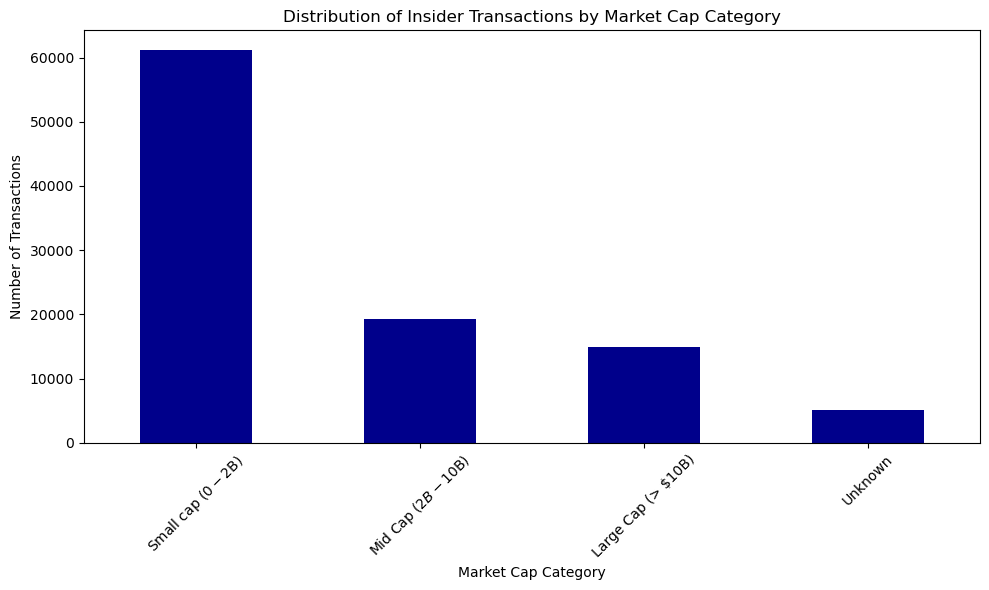

In [9]:
#---------- SECTION 6: MARKET CAP CATEGORIZATION ----------#
# Define market cap categories
def market_cap_category(cap):
    if pd.isna(cap) or cap is None:
        return "Unknown"
    elif cap < 2_000_000_000:
        return "Small cap ($0 - $2B)"
    elif cap < 10_000_000_000:
        return "Mid Cap ($2B - $10B)"
    else:
        return "Large Cap (> $10B)"

# Add market cap category
enhanced_df['market_cap_category'] = enhanced_df['market_cap'].apply(market_cap_category)

# Display distribution of market cap categories
print("\nDistribution of companies by market cap category:")
mc_counts = enhanced_df['market_cap_category'].value_counts()
print(mc_counts)

# Create plot of market cap categories
plt.figure(figsize=(10, 6))
mc_counts.plot(kind='bar', color='darkblue')
plt.title('Distribution of Insider Transactions by Market Cap Category')
plt.xlabel('Market Cap Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribution of companies by sector:
sector
Financial Services    42105
Healthcare             9595
Industrials            9539
Consumer Cyclical      7129
Technology             5400
Utilities              5063
Real Estate            4236
Energy                 3922
Consumer Defensive     3316
Basic Materials        3214
Name: count, dtype: int64


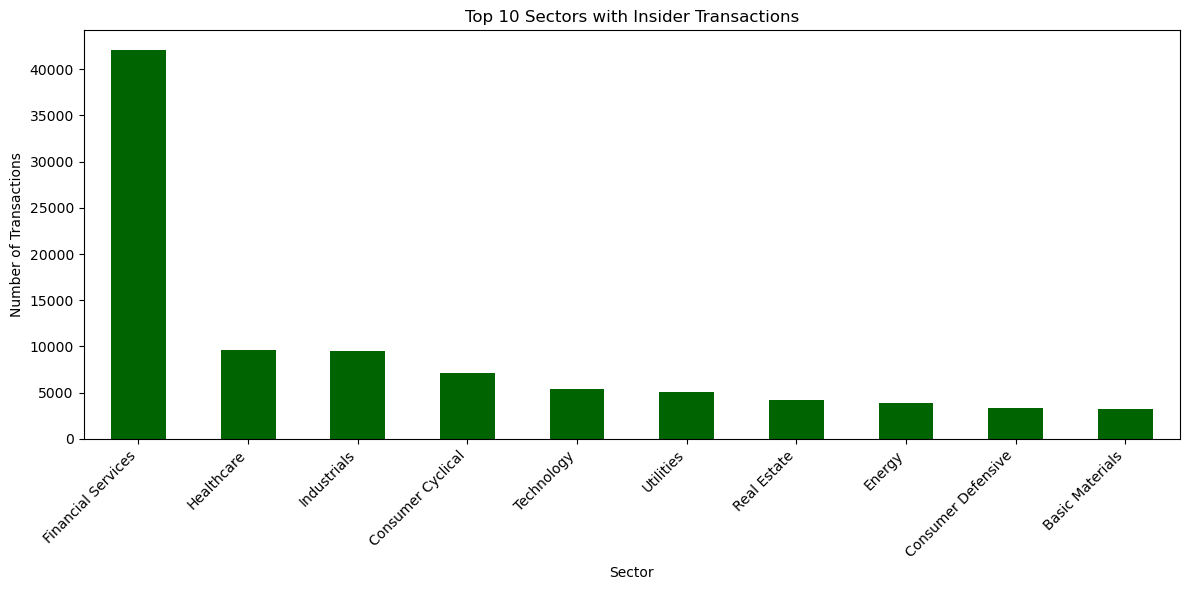


Number of transactions by sector and market cap category:
market_cap_category     Large Cap (> $10B)  Mid Cap ($2B - $10B)  \
sector                                                             
Basic Materials                        545                   885   
Communication Services                 191                   392   
Consumer Cyclical                      844                  1695   
Consumer Defensive                     749                   507   
Energy                                2310                   570   
Financial Services                    2089                  8676   
Healthcare                            1357                  1238   
Industrials                           2062                  2604   
Real Estate                           1109                   685   
Technology                             981                  1218   
Utilities                             2600                   839   

market_cap_category     Small cap ($0 - $2B)  
sector   

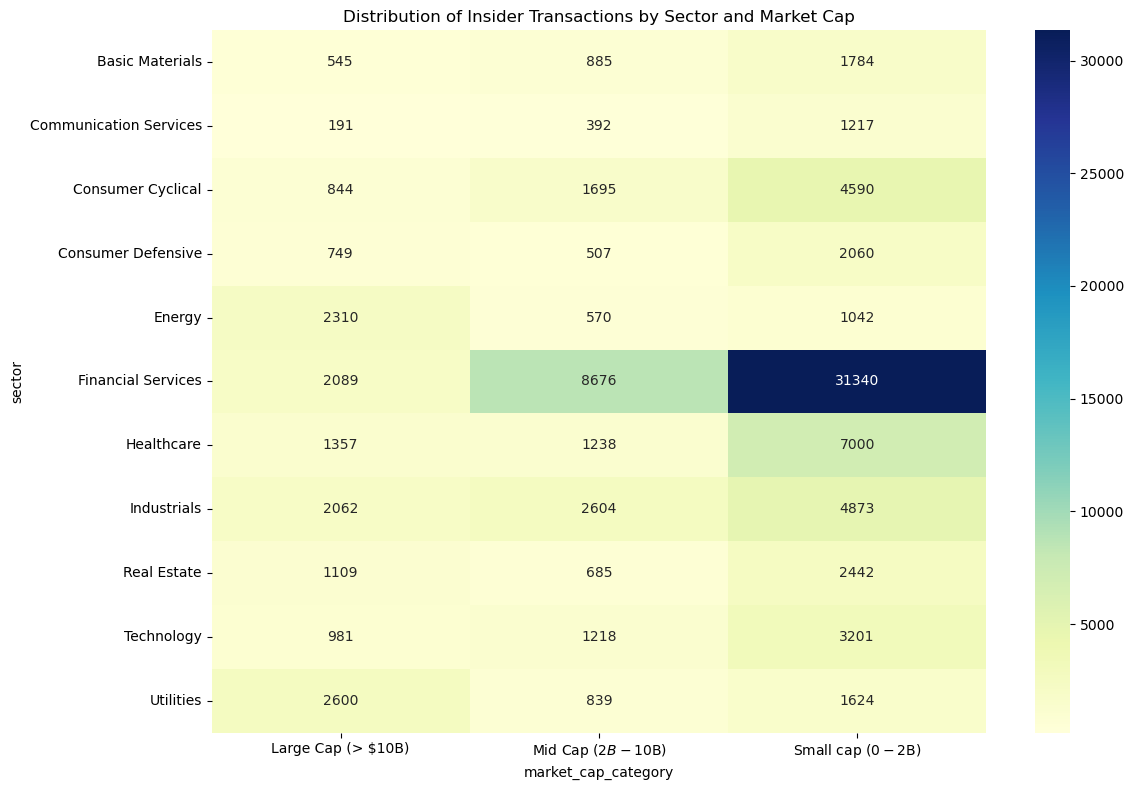

In [10]:
#---------- SECTION 7: SECTOR ANALYSIS ----------#
# Display distribution of sectors
print("\nDistribution of companies by sector:")
sector_counts = enhanced_df['sector'].value_counts().head(10)
print(sector_counts)

# Create plot of top sectors
plt.figure(figsize=(12, 6))
sector_counts.plot(kind='bar', color='darkgreen')
plt.title('Top 10 Sectors with Insider Transactions')
plt.xlabel('Sector')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution of insider transactions by sector and market cap
print("\nNumber of transactions by sector and market cap category:")
sector_mc_counts = pd.crosstab(enhanced_df['sector'], enhanced_df['market_cap_category'])
print(sector_mc_counts)

# Plot heatmap of sector vs market cap
plt.figure(figsize=(12, 8))
sns.heatmap(sector_mc_counts, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Distribution of Insider Transactions by Sector and Market Cap')
plt.tight_layout()
plt.show()

In [11]:
#---------- SECTION 8: ADDITIONAL ANALYSIS WITH ENHANCED DATA ----------#
# Set styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Apply filters to avoid microstructure noise
# 1. Exclude stocks where transaction price per share < $5
# 2. Exclude stocks where market cap < $100 million
df_filtered = enhanced_df.copy()
if 'price_per_share' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['price_per_share'] >= 5]
if 'market_cap' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['market_cap'] >= 100_000_000]

print(f"After filtering: {df_filtered.shape}")
if df_filtered.shape[0] < enhanced_df.shape[0]:
    print(f"Removed {enhanced_df.shape[0] - df_filtered.shape[0]} rows ({(enhanced_df.shape[0] - df_filtered.shape[0])/enhanced_df.shape[0]*100:.1f}% of data)")

# Calculate additional metrics if price data is available
if 'return_6month_pct' in df_filtered.columns and 'spy_return_6month_pct' in df_filtered.columns:
    df_filtered['market_adjusted_return'] = df_filtered['return_6month_pct'] - df_filtered['spy_return_6month_pct']

# Add transaction year for time-based analysis if Transaction Date exists
if 'Transaction Date' in df_filtered.columns:
    df_filtered['Transaction_Year'] = pd.to_datetime(df_filtered['Transaction Date'],format="%d-%b-%Y").dt.year

After filtering: (81408, 61)
Removed 19091 rows (19.0% of data)


In [12]:
#---------- SECTION 9: SECTOR PERFORMANCE ANALYSIS ----------#
if 'return_6month_pct' in df_filtered.columns:
    # Filter out sectors with too few transactions
    min_transactions = 50
    sector_counts_analysis = df_filtered['sector'].value_counts()
    valid_sectors = sector_counts_analysis[sector_counts_analysis >= min_transactions].index

    if len(valid_sectors) > 0:
        # Calculate sector returns
        sector_returns = df_filtered[df_filtered['sector'].isin(valid_sectors)].groupby('sector').agg({
            'return_6month_pct': ['mean', 'median', 'std', 'count'],
            'Ticker': lambda x: x.nunique()  # Number of unique companies
        }).reset_index()

        # Flatten the multi-level columns
        sector_returns.columns = ['sector', 'mean_return', 'median_return', 'std_return', 'count', 'unique_companies']

        # Add success rate (% of positive returns)
        success_rates = df_filtered[df_filtered['sector'].isin(valid_sectors)].groupby('sector').apply(
            lambda x: (x['return_6month_pct'] > 0).mean() * 100).reset_index()
        success_rates.columns = ['sector', 'success_rate']

        sector_returns = sector_returns.merge(success_rates, on='sector')
        sector_returns = sector_returns.sort_values('mean_return', ascending=False)

        print("\n=== SECTOR PERFORMANCE ANALYSIS ===")
        print(sector_returns[['sector', 'mean_return', 'median_return', 'success_rate', 'count', 'unique_companies']])

        # Create bar chart of sector returns
        plt.figure(figsize=(14, 6))
        plt.bar(sector_returns['sector'], sector_returns['mean_return'], color='darkblue')
        plt.axhline(y=0, color='red', linestyle='--')
        plt.axhline(y=df_filtered['return_6month_pct'].mean(), color='green', linestyle='-',
                    label=f'Overall Mean: {df_filtered["return_6month_pct"].mean():.2f}%')
        plt.title('Average 6-Month Returns by Sector')
        plt.xlabel('Sector')
        plt.ylabel('Average Return (%)')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

In [13]:
#---------- SECTION 10: INSIDER TITLE ANALYSIS ----------#
# Count unique values in Insider Title if it exists
if 'Insider Title' in enhanced_df.columns:
    title_counts = enhanced_df['Insider Title'].value_counts().reset_index()
    title_counts.columns = ['Title', 'Count']

    # Show the top 20 most common titles
    print("\nTop 20 most common Insider Titles:")
    print(title_counts.head(20))


Top 20 most common Insider Titles:
                        Title  Count
0                     Missing  63261
1     Chief Executive Officer   2328
2           President and CEO   2079
3             President & CEO   1676
4     Chief Financial Officer   1358
5                   President   1105
6    Executive Vice President    970
7                         CEO    952
8              CEO & Chairman    708
9            Chairman and CEO    670
10      Senior Vice President    645
11             Vice President    631
12             Chairman & CEO    625
13    Chief Operating Officer    476
14                See Remarks    437
15                        CFO    427
16      Chairman of the Board    374
17  Chairman, President & CEO    370
18         Executive Chairman    348
19          President and COO    331


In [14]:
#---------- SECTION 11: SAVE ENHANCED DATASET ----------#
# Save the enhanced dataset
print("\nSaving enhanced dataset...")
try:
    # create a local copy for download
    enhanced_df.to_csv('notebook4_enhanced_corporate_info.csv', index=False)

    print("Enhanced dataset ready for download")

except Exception as e:
    print(f"Error saving file: {e}")

# Final summary
print(f"\n=== PROJECT SUMMARY ===")
print(f"- Started with {insider_df.shape[0]} transactions from Notebook 3")
print(f"- Retrieved company information for {success_count} of {len(unique_tickers)} unique companies")
print(f"- Added {len(company_info_columns)} new company information columns")
print(f"- Enhanced dataset shape: {enhanced_df.shape}")
print(f"- Output file: 'notebook4_enhanced_corporate_info.csv'")
print(f"- Ready for use in subsequent analysis notebooks")


Saving enhanced dataset...
Enhanced dataset ready for download

=== PROJECT SUMMARY ===
- Started with 100499 transactions from Notebook 3
- Retrieved company information for 2851 of 3003 unique companies
- Added 10 new company information columns
- Enhanced dataset shape: (100499, 61)
- Output file: 'notebook4_enhanced_corporate_info.csv'
- Ready for use in subsequent analysis notebooks


After filtering: (81408, 61)
Removed 19091 rows (19.0% of data)


C:\Users\tmacp\AppData\Local\Temp\ipykernel_21236\2393943257.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['Transaction_Year'] = pd.to_datetime(df_filtered['Transaction Date']).dt.year



=== OVERVIEW OF FILTERED DATA ===

Summary statistics of returns (%):
       return_6month_pct  spy_return_6month_pct  market_adjusted_return
count       80007.000000           80007.000000            80007.000000
mean          115.067816               6.250126              108.817689
std          2388.140071              12.194636             2388.176831
min           -99.999997             -46.247208             -140.872589
25%           -40.903597               0.174973              -45.296977
50%           -17.342126               7.499547              -23.635206
75%             4.687504              13.175315               -2.447045
max        157968.965517              54.247717           157966.317557


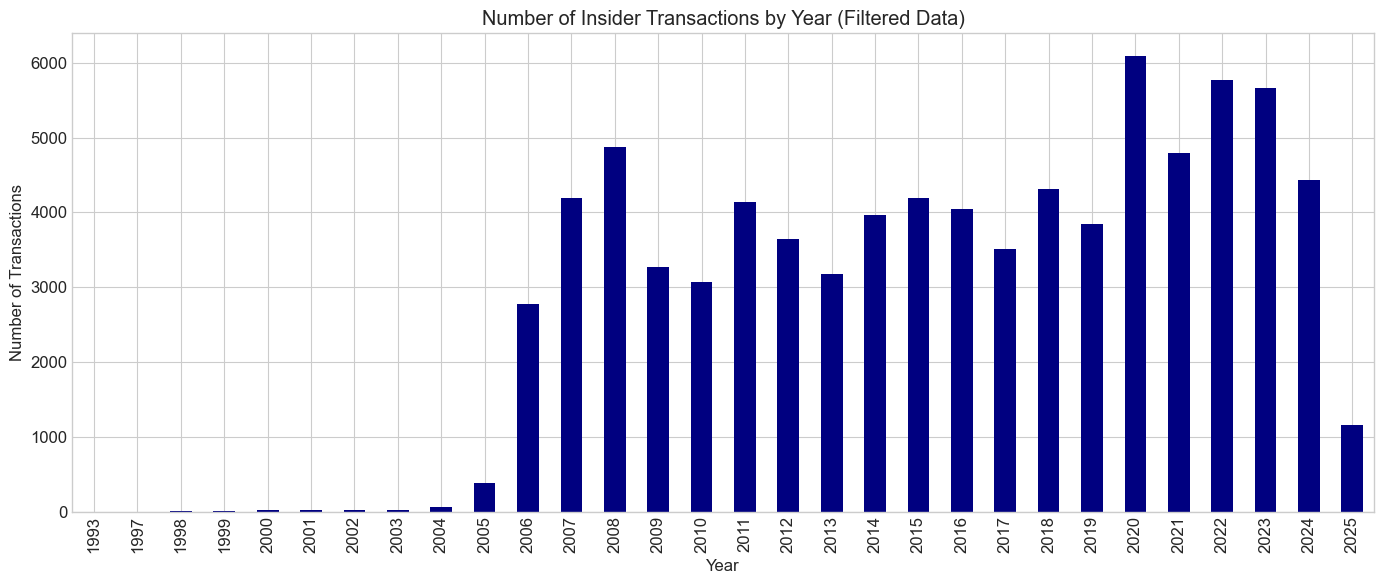

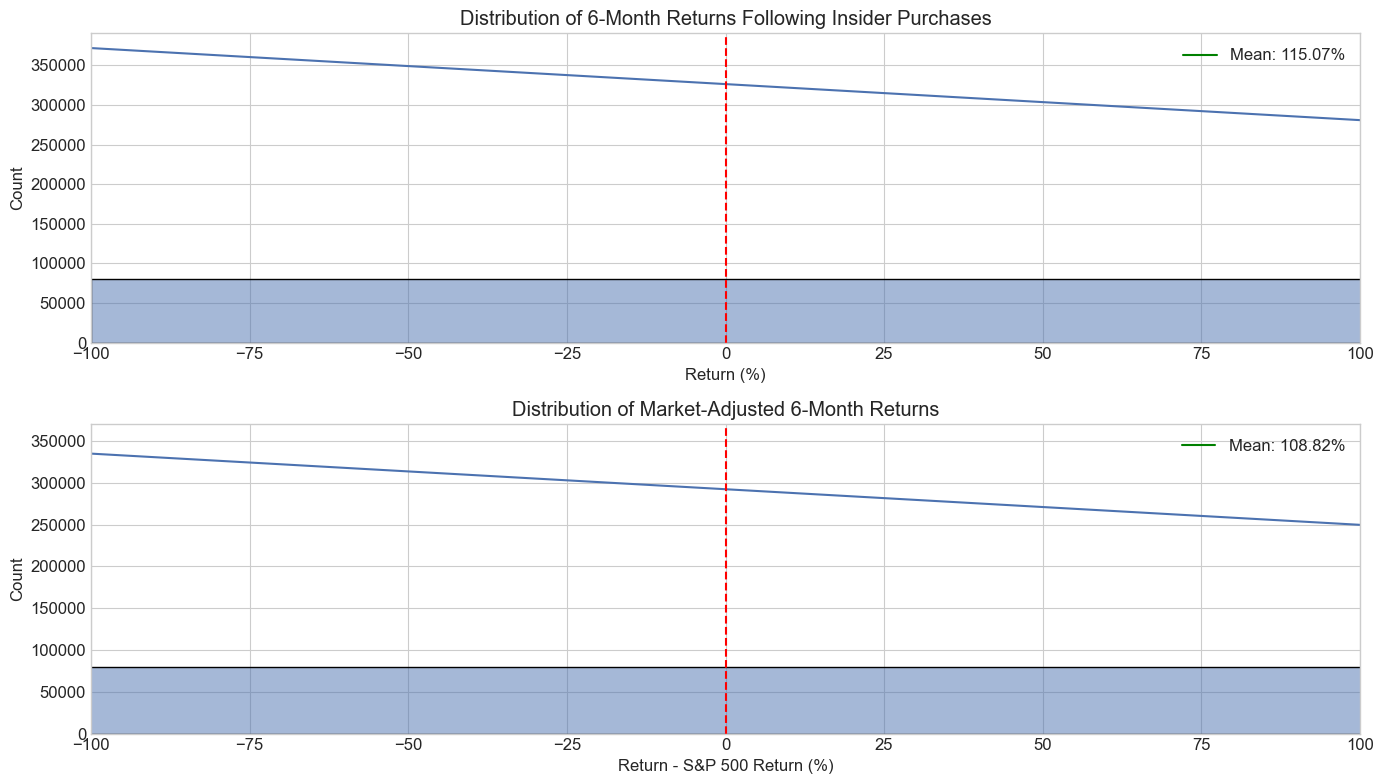

C:\Users\tmacp\AppData\Local\Temp\ipykernel_21236\2393943257.py:99: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  success_rates = df_filtered[df_filtered['sector'].isin(valid_sectors)].groupby('sector').apply(



=== SECTOR PERFORMANCE (FILTERED DATA) ===
                    sector  mean_return  median_return  success_rate  \
0       Financial Services   209.790480     -22.942751     21.634246   
1          Basic Materials   192.844745     -14.769771     31.299213   
2               Healthcare    58.556077       0.203045     48.591262   
3   Communication Services    56.170343      -4.180331     46.414853   
4              Industrials    53.189853      -6.642730     41.192171   
5        Consumer Cyclical    44.908236      -5.813210     41.204940   
6               Technology    34.600638      -1.905758     45.701933   
7                   Energy     5.087270     -44.208394     21.360070   
8       Consumer Defensive   -12.710752     -11.351353     28.471981   
9                Utilities   -22.208748     -20.129654     14.718700   
10             Real Estate   -24.446288     -31.934413     17.859892   

    mean_adj_return  count  unique_companies  
0        203.007316  35944               465

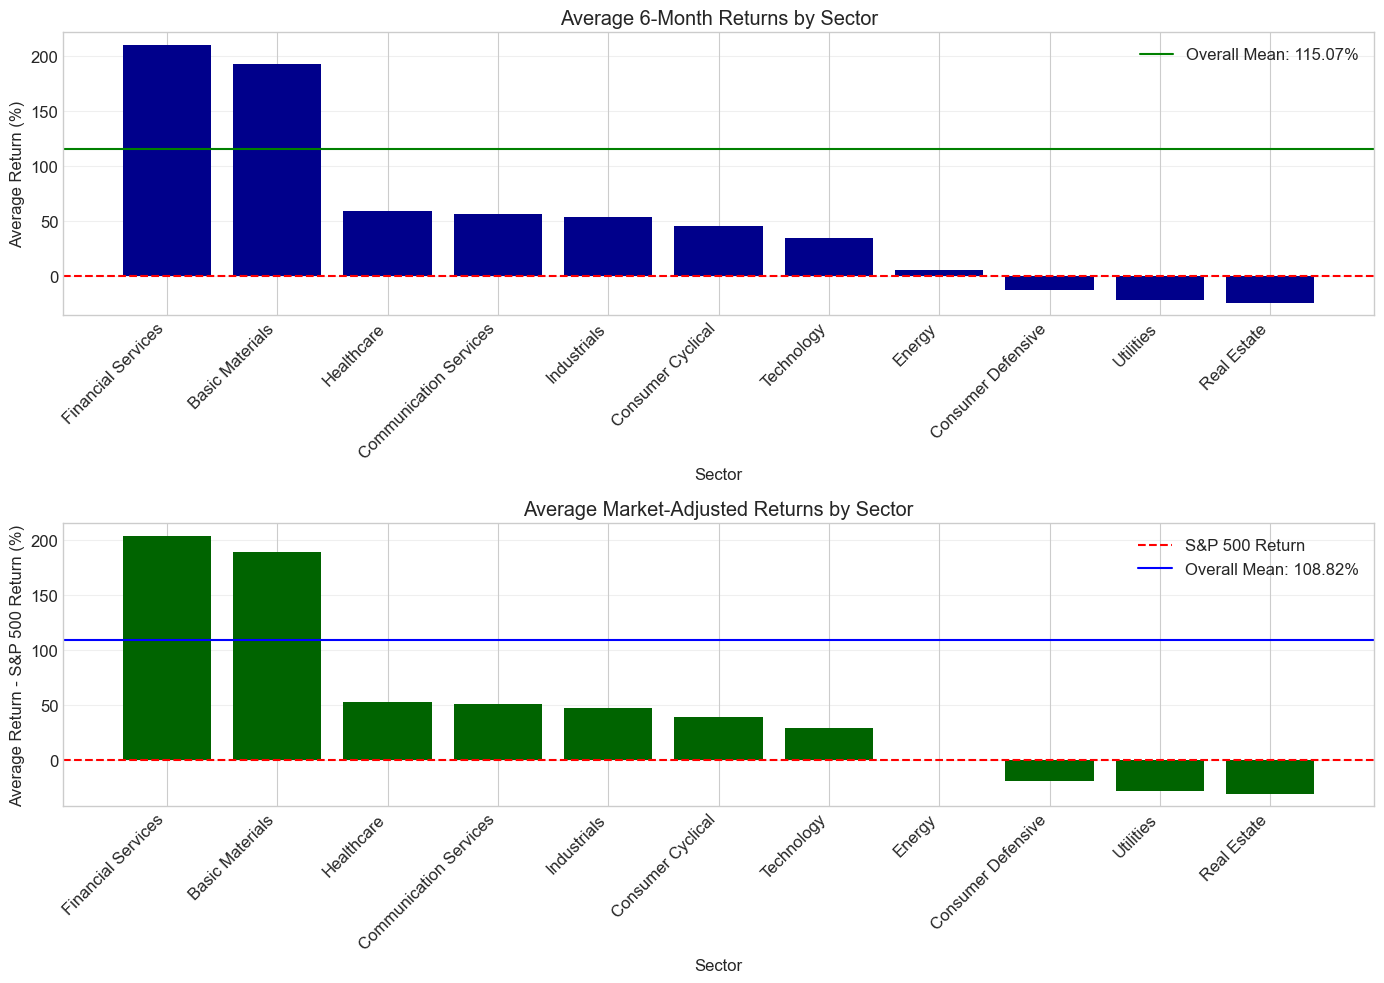

C:\Users\tmacp\AppData\Local\Temp\ipykernel_21236\2393943257.py:166: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  role_success = df_filtered.groupby('Role_Simplified').apply(



=== INSIDER ROLE PERFORMANCE ===
       role  mean_return  median_return  success_rate  mean_adj_return  count
0  DIRECTOR   134.306916     -17.932570     28.275608       127.979328  56110
1     OTHER    69.894534     -15.963372     30.768282        63.826287  23897


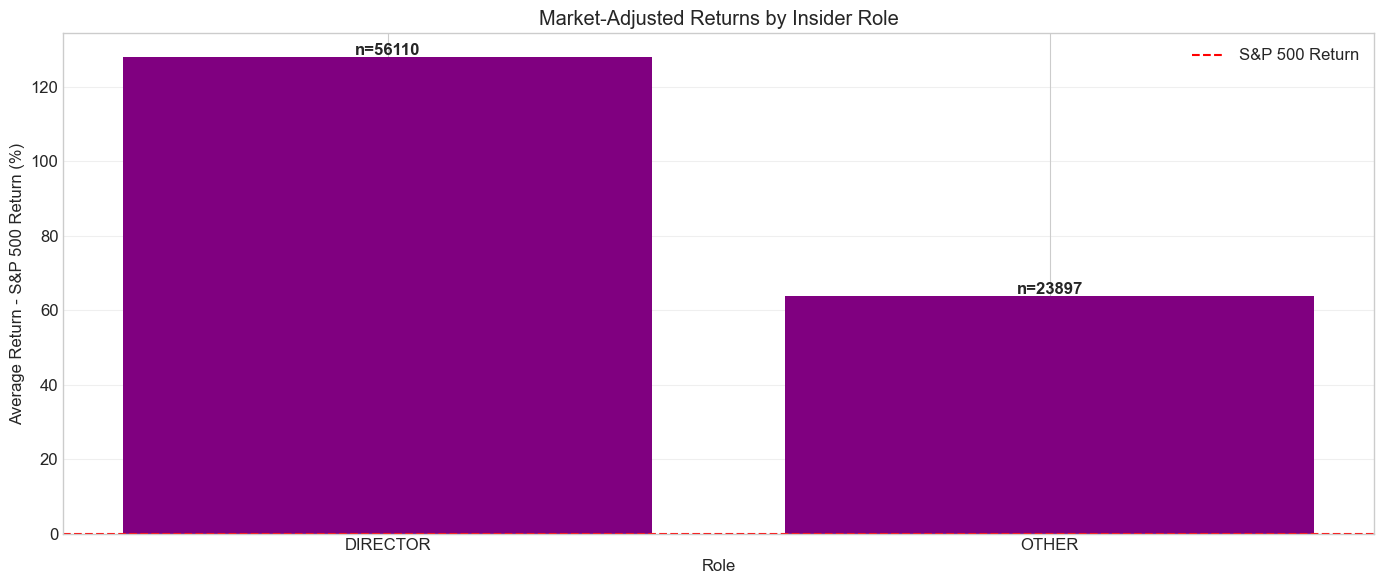


=== YEARLY PERFORMANCE ===
    year  mean_return  mean_spy_return  mean_adj_return  count
0   1993   -62.381364         4.209690       -66.591054      1
1   1997   -36.383629        16.697682       -53.081311      1
2   1998   -43.436118        10.737448       -54.173566      5
3   1999   -52.042880         8.627036       -60.669915      5
4   2000   -48.420970       -10.951359       -37.469611     19
5   2001   -26.189808        -4.249997       -21.939811     20
6   2002   -38.683442        -9.154289       -29.529153     15
7   2003   -24.695060        12.731609       -37.426669     27
8   2004   -33.695005         1.857761       -35.552766     58
9   2005   -12.963960         4.927629       -17.891589    386
10  2006    25.836004         8.078591        17.757413   2777
11  2007   -22.019514        -3.312315       -18.707199   4192
12  2008    42.466159       -16.432513        58.898673   4867
13  2009   -19.030268        20.128693       -39.158962   3273
14  2010     1.063506      

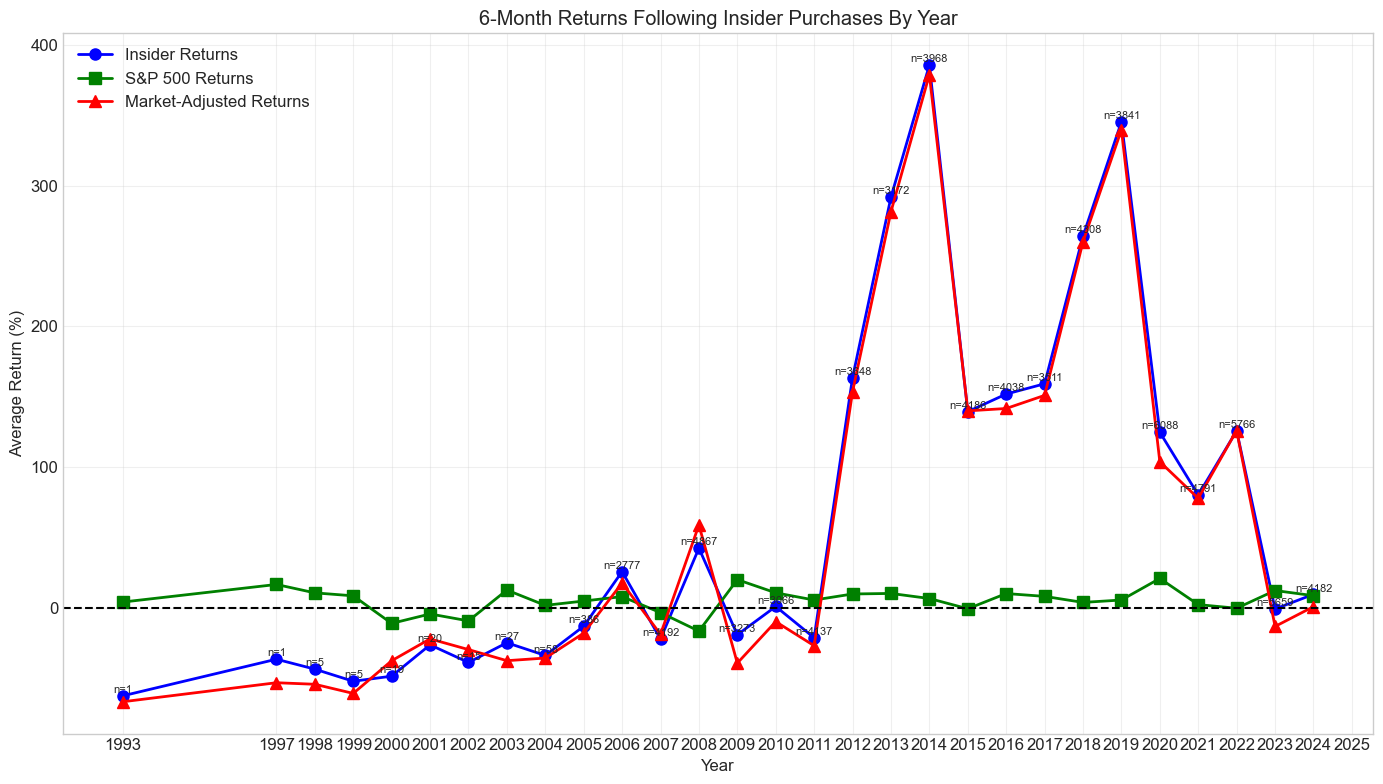


=== CONSUMER DEFENSIVE INDUSTRY ANALYSIS ===
                               industry  mean_return  median_return  \
2   Beverages - Wineries & Distilleries     0.152414      -4.090914   
5         Education & Training Services    -3.797515      -5.251770   
7                     Food Distribution   -10.028379      -9.693598   
1             Beverages - Non-Alcoholic   -11.175991      -7.749998   
6                         Farm Products   -14.524629     -15.898211   
10                       Packaged Foods   -15.051811     -18.085013   
8                        Grocery Stores   -17.544496     -13.138763   
4                       Discount Stores   -17.664915     -11.023959   
11                              Tobacco   -22.982586     -38.189478   
3                         Confectioners   -23.306212     -25.372219   
9         Household & Personal Products   -26.189115     -26.229810   

    mean_adj_return  count  
2         -4.803138    535  
5        -11.453115    141  
7        -14.6

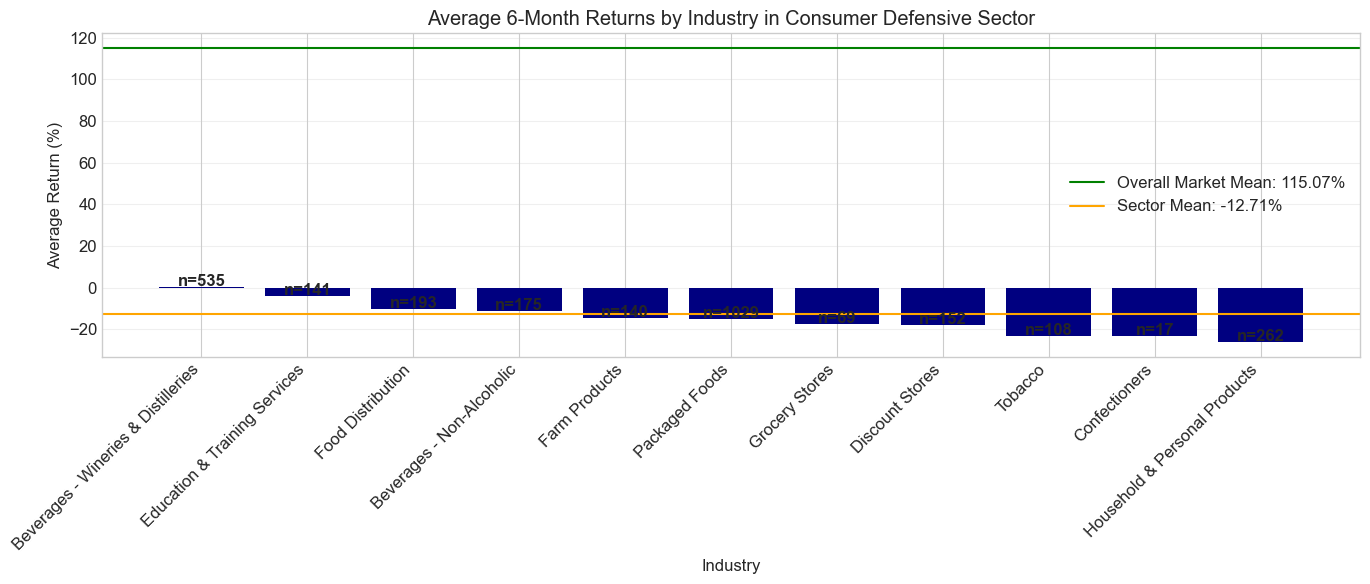


=== SUCCESS RATES AND RISK-ADJUSTED RETURNS ===

Sectors by Success Rate (% positive returns):
                    sector  success_rate  mean_adj_return  sharpe_ratio  count
2               Healthcare     48.591262        52.620574      0.146936   7117
3   Communication Services     46.414853        51.088355      0.245605   1529
6               Technology     45.701933        28.720452      0.038713   3810
5        Consumer Cyclical     41.204940        38.679152      0.062764   5873
4              Industrials     41.192171        46.862683      0.020142   7744
1          Basic Materials     31.299213       189.051316      0.033755   3003
8       Consumer Defensive     28.471981       -18.852082     -0.589171   2826
0       Financial Services     21.634246       203.007316      0.068706  35944
7                   Energy     21.360070        -0.219713     -0.000627   3318
10             Real Estate     17.859892       -30.527328     -0.714641   3834
9                Utilities     14.7

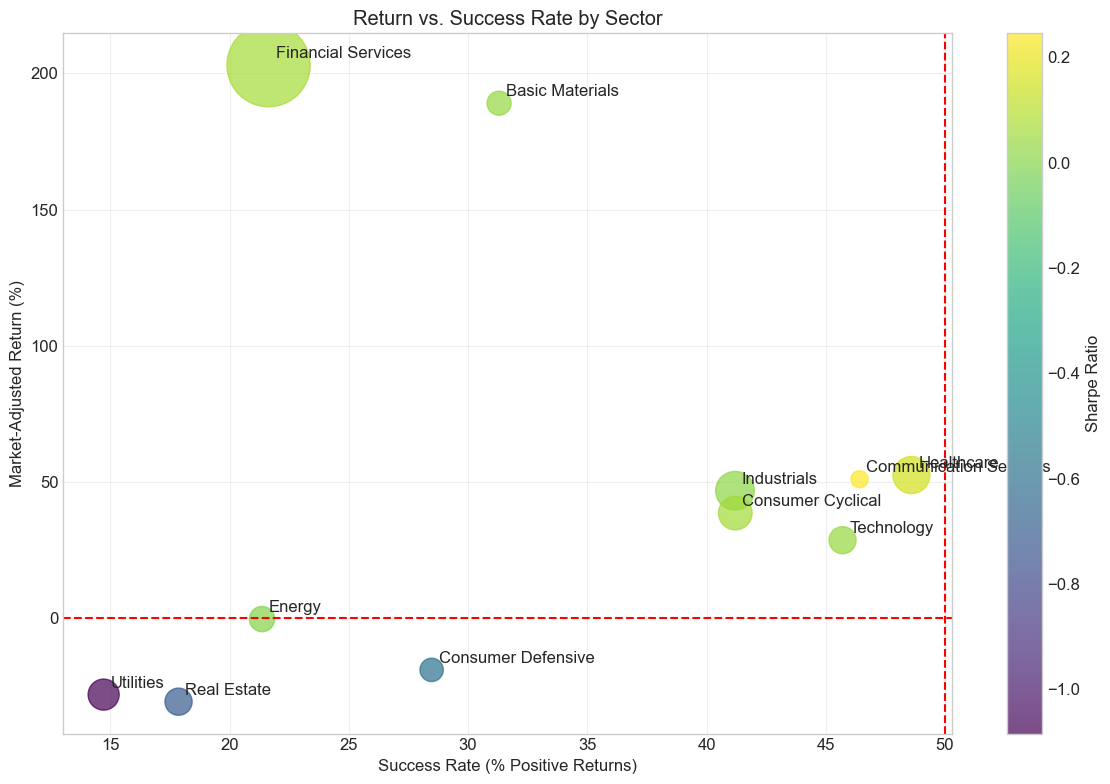


=== SUMMARY STATISTICS ===
Total insider transactions (after filtering): 81408
Unique companies: 2138
Date range: 1993 to 2025
Average 6-month return: 115.07%
Median 6-month return: -17.34%
Average market-adjusted return: 108.82%
Percentage of positive returns: 29.0%
Percentage of transactions beating the S&P 500: 22.4%


In [15]:
# Apply filters to avoid microstructure noise
# 1. Exclude stocks where transaction price per share < $5
# 2. Exclude stocks where market cap < $100 million (convert to same units)
df_filtered = enhanced_df.copy()
df_filtered = df_filtered[df_filtered['price_per_share'] >= 5]
df_filtered = df_filtered[df_filtered['market_cap'] >= 100_000_000]  # Assuming market cap is in dollars

print(f"After filtering: {df_filtered.shape}")
print(f"Removed {enhanced_df.shape[0] - df_filtered.shape[0]} rows ({(enhanced_df.shape[0] - df_filtered.shape[0])/enhanced_df.shape[0]*100:.1f}% of data)")

#------------------------#
# Calculate Key Metrics
#------------------------#
# Calculate market-adjusted returns
df_filtered['return_6month_pct'] = ((df_filtered['price_6month'] - df_filtered['average_price_per_share']) / 
                                    df_filtered['average_price_per_share'] * 100)
df_filtered['spy_return_6month_pct'] = ((df_filtered['spy_price_6month'] - df_filtered['spy_price_transactiondate']) /
                                        df_filtered['spy_price_transactiondate'] * 100)
df_filtered['market_adjusted_return'] = df_filtered['return_6month_pct'] - df_filtered['spy_return_6month_pct']

# Add transaction year for time-based analysis
df_filtered['Transaction_Year'] = pd.to_datetime(df_filtered['Transaction Date']).dt.year

#------------------------#
# 1. Overview of Data
#------------------------#
print("\n=== OVERVIEW OF FILTERED DATA ===")

# Summary statistics of returns
returns_summary = df_filtered[['return_6month_pct', 'spy_return_6month_pct', 'market_adjusted_return']].describe()
print("\nSummary statistics of returns (%):")
print(returns_summary)

# Distribution of transaction years
year_counts = df_filtered['Transaction_Year'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
year_counts.plot(kind='bar', color='navy')
plt.title('Number of Insider Transactions by Year (Filtered Data)')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.savefig('transactions_by_year.png', dpi=300)
plt.show()

#------------------------#
# 2. Return Distributions
#------------------------#
plt.figure(figsize=(14, 8))

# Top: Raw 6-month returns
plt.subplot(2, 1, 1)
sns.histplot(df_filtered['return_6month_pct'], bins=50, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=df_filtered['return_6month_pct'].mean(), color='green', linestyle='-',
            label=f'Mean: {df_filtered["return_6month_pct"].mean():.2f}%')
plt.title('Distribution of 6-Month Returns Following Insider Purchases')
plt.xlabel('Return (%)')
plt.xlim(-100, 100)  # Reasonable limits for readability
plt.legend()

# Bottom: Market-adjusted returns
plt.subplot(2, 1, 2)
sns.histplot(df_filtered['market_adjusted_return'], bins=50, kde=True)
plt.axvline(x=0, color='red', linestyle='--')
plt.axvline(x=df_filtered['market_adjusted_return'].mean(), color='green', linestyle='-',
            label=f'Mean: {df_filtered["market_adjusted_return"].mean():.2f}%')
plt.title('Distribution of Market-Adjusted 6-Month Returns')
plt.xlabel('Return - S&P 500 Return (%)')
plt.xlim(-100, 100)  # Reasonable limits for readability
plt.legend()

plt.tight_layout()
plt.savefig('return_distributions.png', dpi=300)
plt.show()

#------------------------#
# 3. Sector Analysis
#------------------------#
# Filter out sectors with too few transactions
min_transactions = 50
sector_counts = df_filtered['sector'].value_counts()
valid_sectors = sector_counts[sector_counts >= min_transactions].index

# Calculate sector returns - raw and market-adjusted
sector_returns = df_filtered[df_filtered['sector'].isin(valid_sectors)].groupby('sector').agg({
    'return_6month_pct': ['mean', 'median', 'std', 'count'],
    'market_adjusted_return': ['mean', 'median', 'std'],
    'Ticker': lambda x: x.nunique()  # Number of unique companies
}).reset_index()

# Flatten the multi-level columns
sector_returns.columns = ['sector', 'mean_return', 'median_return', 'std_return', 'count',
                         'mean_adj_return', 'median_adj_return', 'std_adj_return', 'unique_companies']

# Sort by mean market-adjusted return
sector_returns = sector_returns.sort_values('mean_adj_return', ascending=False)

# Add success rate (% of positive returns)
success_rates = df_filtered[df_filtered['sector'].isin(valid_sectors)].groupby('sector').apply(
    lambda x: (x['return_6month_pct'] > 0).mean() * 100).reset_index()
success_rates.columns = ['sector', 'success_rate']

sector_returns = sector_returns.merge(success_rates, on='sector')

print("\n=== SECTOR PERFORMANCE (FILTERED DATA) ===")
print(sector_returns[['sector', 'mean_return', 'median_return', 'success_rate',
                      'mean_adj_return', 'count', 'unique_companies']])

# Create bar chart of sector returns
plt.figure(figsize=(14, 10))

# Top plot: Raw returns
plt.subplot(2, 1, 1)
plt.bar(sector_returns['sector'], sector_returns['mean_return'], color='darkblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=df_filtered['return_6month_pct'].mean(), color='green', linestyle='-',
            label=f'Overall Mean: {df_filtered["return_6month_pct"].mean():.2f}%')
plt.title('Average 6-Month Returns by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Return (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Bottom plot: Market-adjusted returns
plt.subplot(2, 1, 2)
plt.bar(sector_returns['sector'], sector_returns['mean_adj_return'], color='darkgreen')
plt.axhline(y=0, color='red', linestyle='--', label='S&P 500 Return')
plt.axhline(y=df_filtered['market_adjusted_return'].mean(), color='blue', linestyle='-',
            label=f'Overall Mean: {df_filtered["market_adjusted_return"].mean():.2f}%')
plt.title('Average Market-Adjusted Returns by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Return - S&P 500 Return (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('sector_returns.png', dpi=300)
plt.show()

#------------------------#
# 4. Insider Role Analysis
#------------------------#
# Simplify the insider roles for better aggregation
df_filtered['Role_Simplified'] = df_filtered['Insider Role'].str.upper()
df_filtered.loc[df_filtered['Role_Simplified'].str.contains('CEO|CHIEF EXECUTIVE', na=False), 'Role_Simplified'] = 'CEO'
df_filtered.loc[df_filtered['Role_Simplified'].str.contains('CFO|CHIEF FINANCIAL', na=False), 'Role_Simplified'] = 'CFO'
df_filtered.loc[df_filtered['Role_Simplified'].str.contains('DIRECTOR', na=False), 'Role_Simplified'] = 'DIRECTOR'
df_filtered.loc[df_filtered['Role_Simplified'].str.contains('COO|CHIEF OPERATING', na=False), 'Role_Simplified'] = 'COO'
df_filtered.loc[df_filtered['Role_Simplified'].str.contains('PRESIDENT', na=False), 'Role_Simplified'] = 'PRESIDENT'
df_filtered.loc[df_filtered['Role_Simplified'].str.contains('VP|VICE PRESIDENT', na=False), 'Role_Simplified'] = 'VP'
df_filtered.loc[~df_filtered['Role_Simplified'].isin(['CEO', 'CFO', 'DIRECTOR', 'COO', 'PRESIDENT', 'VP']), 'Role_Simplified'] = 'OTHER'

# Calculate returns by insider role
role_returns = df_filtered.groupby('Role_Simplified').agg({
    'return_6month_pct': ['mean', 'median', 'std', 'count'],
    'market_adjusted_return': ['mean', 'median', 'std']
}).reset_index()

# Flatten multi-level columns
role_returns.columns = ['role', 'mean_return', 'median_return', 'std_return', 'count',
                        'mean_adj_return', 'median_adj_return', 'std_adj_return']

# Calculate success rates
role_success = df_filtered.groupby('Role_Simplified').apply(
    lambda x: (x['return_6month_pct'] > 0).mean() * 100).reset_index()
role_success.columns = ['role', 'success_rate']

role_returns = role_returns.merge(role_success, on='role')
role_returns = role_returns.sort_values('mean_adj_return', ascending=False)

print("\n=== INSIDER ROLE PERFORMANCE ===")
print(role_returns[['role', 'mean_return', 'median_return', 'success_rate', 'mean_adj_return', 'count']])

# Plot role-based returns
plt.figure(figsize=(14, 6))
plt.bar(role_returns['role'], role_returns['mean_adj_return'], color='purple')
plt.axhline(y=0, color='red', linestyle='--', label='S&P 500 Return')
plt.title('Market-Adjusted Returns by Insider Role')
plt.xlabel('Role')
plt.ylabel('Average Return - S&P 500 Return (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.legend()

# Add transaction counts as text on each bar
for i, v in enumerate(role_returns['count']):
    plt.text(i, role_returns['mean_adj_return'].iloc[i] + 0.5,
             f'n={v}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('role_returns.png', dpi=300)
plt.show()

#------------------------#
# 5. Time-Based Analysis
#------------------------#
# Calculate average returns by year
yearly_returns = df_filtered.groupby('Transaction_Year').agg({
    'return_6month_pct': ['mean', 'median', 'std', 'count'],
    'spy_return_6month_pct': 'mean',
    'market_adjusted_return': 'mean'
}).reset_index()

# Flatten multi-level columns
yearly_returns.columns = ['year', 'mean_return', 'median_return', 'std_return', 'count',
                          'mean_spy_return', 'mean_adj_return']

print("\n=== YEARLY PERFORMANCE ===")
print(yearly_returns[['year', 'mean_return', 'mean_spy_return', 'mean_adj_return', 'count']])

# Plot returns over time
plt.figure(figsize=(14, 8))

plt.plot(yearly_returns['year'], yearly_returns['mean_return'], 'o-', color='blue',
         linewidth=2, markersize=8, label='Insider Returns')
plt.plot(yearly_returns['year'], yearly_returns['mean_spy_return'], 's-', color='green',
         linewidth=2, markersize=8, label='S&P 500 Returns')
plt.plot(yearly_returns['year'], yearly_returns['mean_adj_return'], '^-', color='red',
         linewidth=2, markersize=8, label='Market-Adjusted Returns')

plt.axhline(y=0, color='black', linestyle='--')
plt.title('6-Month Returns Following Insider Purchases By Year')
plt.xlabel('Year')
plt.ylabel('Average Return (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(yearly_returns['year'])

# Add transaction counts as text
for i, year in enumerate(yearly_returns['year']):
    plt.text(year, yearly_returns['mean_return'].iloc[i] + 2,
             f'n={yearly_returns["count"].iloc[i]}', ha='center', fontsize=8)

plt.tight_layout()
plt.savefig('yearly_returns.png', dpi=300)
plt.show()

#------------------------#
# 6. Consumer Defensive Deep Dive
#------------------------#
# Focus on Consumer Defensive Sector after filtering
consumer_defensive = df_filtered[df_filtered['sector'] == 'Consumer Defensive'].copy()

# Calculate returns by industry within Consumer Defensive
cd_industry_returns = consumer_defensive.groupby('industry').agg({
    'return_6month_pct': ['mean', 'median', 'std', 'count'],
    'market_adjusted_return': ['mean', 'median']
}).reset_index()

# Flatten multi-level columns
cd_industry_returns.columns = ['industry', 'mean_return', 'median_return', 'std_return', 'count',
                              'mean_adj_return', 'median_adj_return']

# Filter for minimum sample size
cd_industry_returns = cd_industry_returns[cd_industry_returns['count'] >= 10]
cd_industry_returns = cd_industry_returns.sort_values('mean_return', ascending=False)

print("\n=== CONSUMER DEFENSIVE INDUSTRY ANALYSIS ===")
print(cd_industry_returns[['industry', 'mean_return', 'median_return', 'mean_adj_return', 'count']])

# Plot industry returns within Consumer Defensive
plt.figure(figsize=(14, 6))
plt.bar(cd_industry_returns['industry'], cd_industry_returns['mean_return'], color='navy')
plt.axhline(y=df_filtered['return_6month_pct'].mean(), color='green', linestyle='-',
            label=f'Overall Market Mean: {df_filtered["return_6month_pct"].mean():.2f}%')
plt.axhline(y=consumer_defensive['return_6month_pct'].mean(), color='orange', linestyle='-',
            label=f'Sector Mean: {consumer_defensive["return_6month_pct"].mean():.2f}%')
plt.title('Average 6-Month Returns by Industry in Consumer Defensive Sector')
plt.xlabel('Industry')
plt.ylabel('Average Return (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add transaction counts as text
for i, v in enumerate(cd_industry_returns['count']):
    plt.text(i, cd_industry_returns['mean_return'].iloc[i] + 0.5,
             f'n={v}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('consumer_defensive_industry.png', dpi=300)
plt.show()

#------------------------#
# 7. Success Rate Analysis
#------------------------#
# Calculate success rates and risk-adjusted returns
print("\n=== SUCCESS RATES AND RISK-ADJUSTED RETURNS ===")

# Add Sharpe ratio (risk-adjusted return)
sector_returns['sharpe_ratio'] = sector_returns['mean_adj_return'] / sector_returns['std_adj_return']

# Print sectors by success rate
success_by_sector = sector_returns.sort_values('success_rate', ascending=False)
print("\nSectors by Success Rate (% positive returns):")
print(success_by_sector[['sector', 'success_rate', 'mean_adj_return', 'sharpe_ratio', 'count']])

# Create a scatter plot of return vs. success rate
plt.figure(figsize=(12, 8))
scatter = plt.scatter(sector_returns['success_rate'], sector_returns['mean_adj_return'],
                      s=sector_returns['count']/10, # Size by sample count
                      c=sector_returns['sharpe_ratio'], # Color by Sharpe ratio
                      cmap='viridis', alpha=0.7)

plt.axhline(y=0, color='red', linestyle='--')
plt.axvline(x=50, color='red', linestyle='--')
plt.colorbar(scatter, label='Sharpe Ratio')

# Add sector labels
for i, row in sector_returns.iterrows():
    plt.annotate(row['sector'],
                 (row['success_rate'], row['mean_adj_return']),
                 xytext=(5, 5), textcoords='offset points')

plt.title('Return vs. Success Rate by Sector')
plt.xlabel('Success Rate (% Positive Returns)')
plt.ylabel('Market-Adjusted Return (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('success_rate_vs_return.png', dpi=300)
plt.show()

#------------------------#
# 8. Summary Statistics
#------------------------#
print("\n=== SUMMARY STATISTICS ===")

# Overall statistics
positive_pct = (df_filtered['return_6month_pct'] > 0).mean() * 100
beat_market_pct = (df_filtered['market_adjusted_return'] > 0).mean() * 100

print(f"Total insider transactions (after filtering): {df_filtered.shape[0]}")
print(f"Unique companies: {df_filtered['Ticker'].nunique()}")
print(f"Date range: {df_filtered['Transaction_Year'].min()} to {df_filtered['Transaction_Year'].max()}")
print(f"Average 6-month return: {df_filtered['return_6month_pct'].mean():.2f}%")
print(f"Median 6-month return: {df_filtered['return_6month_pct'].median():.2f}%")
print(f"Average market-adjusted return: {df_filtered['market_adjusted_return'].mean():.2f}%")
print(f"Percentage of positive returns: {positive_pct:.1f}%")
print(f"Percentage of transactions beating the S&P 500: {beat_market_pct:.1f}%")